In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/HR_Analytics.csv.csv')

# Separate target column 'Attrition' and define feature set
target_column = 'Attrition'
X = data.drop(columns=[target_column])  # Features (excluding the target)
y = data[target_column]  # Target variable

# Apply One-Hot Encoding to the categorical columns (excluding 'Attrition')
X_encoded = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding for all categorical columns except 'Attrition'

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the SVM model
svm = SVC()

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel types
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model based on grid search
best_svm = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_svm.score(X_test, y_test)
print(f'Best SVM model accuracy: {accuracy:.2f}')


Best SVM model accuracy: 0.88


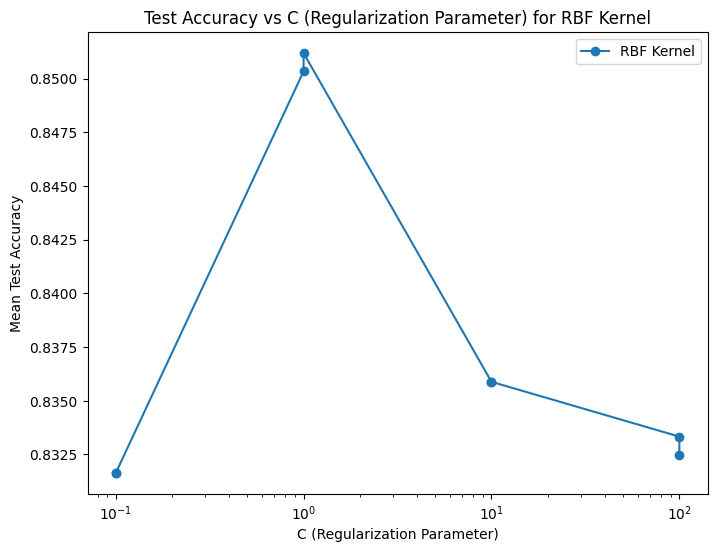

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert GridSearchCV results to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plotting accuracy for different values of C for 'rbf' kernel
rbf_results = results[results['param_kernel'] == 'rbf']

plt.figure(figsize=(8, 6))
plt.plot(rbf_results['param_C'], rbf_results['mean_test_score'], marker='o', label='RBF Kernel')
plt.title('Test Accuracy vs C (Regularization Parameter) for RBF Kernel')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Test Accuracy')
plt.xscale('log')  # C values are usually plotted on a log scale
plt.legend()
plt.show()


In [8]:
# Final evaluation on the test set
final_accuracy = best_svm.score(X_test, y_test)
print(f'Final accuracy of the fine-tuned SVM model: {final_accuracy:.2f}')


Final accuracy of the fine-tuned SVM model: 0.88


In [9]:
pip install flask joblib networkx


In [10]:
import joblib

# Save the best SVM model to a file
joblib.dump(best_svm, 'best_svm_model.pkl')


['best_svm_model.pkl']

In [13]:
from flask import Flask, request, render_template
import joblib
import networkx as nx
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load the pre-trained SVM model
model = joblib.load('best_svm_model.pkl')

# Define the knowledge graph using NetworkX
def create_knowledge_graph():
    G = nx.Graph()
    # Add some sample nodes and edges for demonstration
    G.add_node("Retention", description="Retention Strategies")
    G.add_node("Attrition", description="Employee Attrition Risks")
    G.add_node("Training", description="Employee Training Programs")
    G.add_node("Work-Life Balance", description="Work-Life Balance Programs")

    G.add_edge("Attrition", "Retention", relation="Prevent Attrition")
    G.add_edge("Attrition", "Training", relation="Improve Skills")
    G.add_edge("Attrition", "Work-Life Balance", relation="Enhance Well-Being")
    return G

# Create the knowledge graph
knowledge_graph = create_knowledge_graph()

# Function to query knowledge graph based on prediction
def query_knowledge_graph(prediction):
    # Assuming 1 means risk of attrition, and 0 means no risk
    if prediction == 1:
        # Attrition predicted, recommend retention strategies
        recommendations = list(knowledge_graph.neighbors("Attrition"))
        description = [knowledge_graph.nodes[rec]["description"] for rec in recommendations]
        return {"recommendations": recommendations, "description": description}
    else:
        return {"message": "No Attrition Risk Detected"}

# Route to render the HTML form
@app.route('/')
def index():
    return render_template('index.html')

# Route to handle form submission and make predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the form (comma-separated values)
    input_data = request.form['data']

    # Convert the input data to a numpy array
    input_data = np.array([float(x) for x in input_data.split(',')]).reshape(1, -1)

    # Make predictions using the loaded SVM model
    prediction = model.predict(input_data)[0]

    # Query the knowledge graph based on prediction
    knowledge_graph_result = query_knowledge_graph(prediction)

    # Render the result on a new HTML page
    return render_template('result.html',
                           prediction=prediction,
                           knowledge_graph=knowledge_graph_result)

# Run the app
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


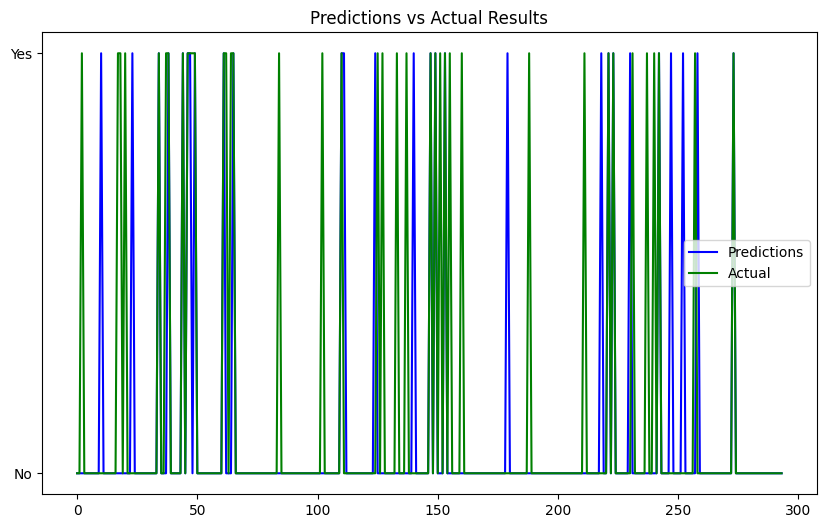

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some predictions using the test set
predictions = best_svm.predict(X_test)

# Plot predictions vs actual results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(predictions)), predictions, label='Predictions', color='b')
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='g')
plt.title('Predictions vs Actual Results')
plt.legend()
plt.show()


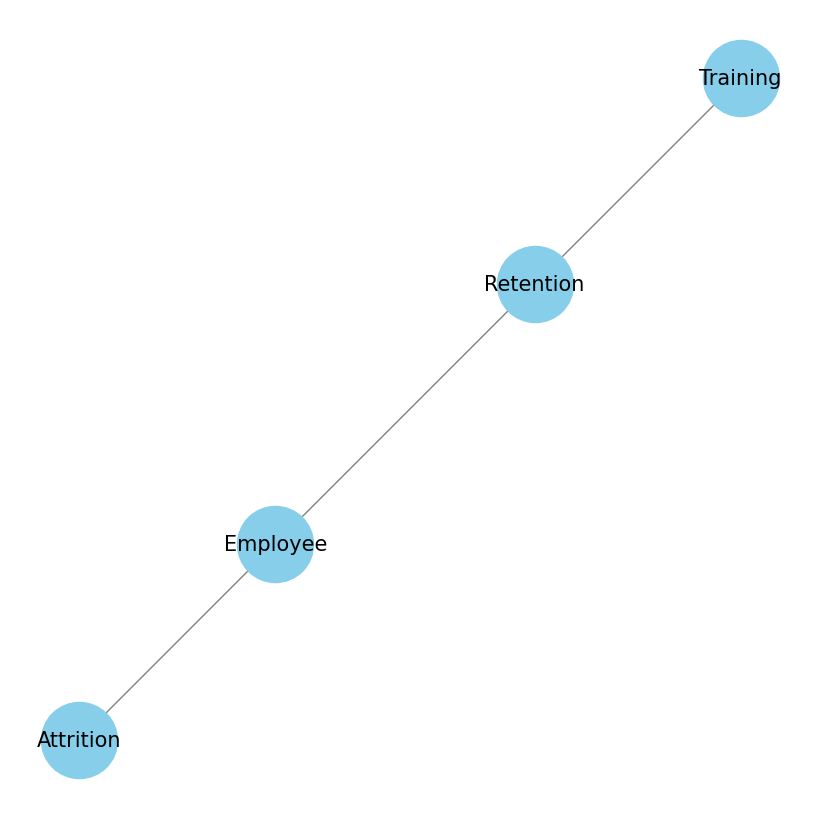

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple knowledge graph using NetworkX
G = nx.Graph()

# Add nodes and edges (this is an example, you can expand as needed)
G.add_edge('Employee', 'Attrition', weight=0.8)
G.add_edge('Employee', 'Retention', weight=0.5)
G.add_edge('Retention', 'Training', weight=0.7)

# Plot the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=3000, font_size=15)
plt.show()
